In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
import numpy as np

%matplotlib inline

## Load Data

In [5]:
df = pd.read_csv('../Data/iris.data', names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'])
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df['Species'] = df['Species'].apply(lambda x: x[5:])

In [7]:
df = df[(df['Species']=='versicolor')|(df['Species']=='virginica')]
df['Label'] = df['Species'].replace(to_replace = ['versicolor','virginica'], value=[1,-1])
df = df.drop('Species', axis = 1)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Label
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [8]:
df['w1'] = 1/df.shape[0]
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Label,w1
50,7.0,3.2,4.7,1.4,1,0.01
51,6.4,3.2,4.5,1.5,1,0.01
52,6.9,3.1,4.9,1.5,1,0.01
53,5.5,2.3,4.0,1.3,1,0.01
54,6.5,2.8,4.6,1.5,1,0.01


In [9]:
random.seed(12)
df_1 = df.sample(df.shape[0], replace=True, weights=df['w1'])
df_1

,SepalLength,SepalWidth,PetalLength,PetalWidth,Label,w1
80,5.5,2.4,3.8,1.1,1,0.01
128,6.4,2.8,5.6,2.1,-1,0.01
87,6.3,2.3,4.4,1.3,1,0.01
118,7.7,2.6,6.9,2.3,-1,0.01
87,6.3,2.3,4.4,1.3,1,0.01
...,...,...,...,...,...,...
135,7.7,3.0,6.1,2.3,-1,0.01
100,6.3,3.3,6.0,2.5,-1,0.01
84,5.4,3.0,4.5,1.5,1,0.01
67,5.8,2.7,4.1,1.0,1,0.01


In [10]:
X_train = df.iloc[0:len(df), 0:4]
y_train = df.iloc[0:len(df), 4]

## Train Decision Tree (Round 1)

[Text(167.4, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(83.7, 54.360000000000014, 'gini = 0.168\nsamples = 54\nvalue = [5, 49]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.043\nsamples = 46\nvalue = [45, 1]')]

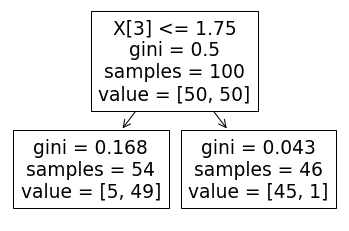

In [11]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', 
                                  random_state=100, 
                                  max_depth = 1)
clf = clf_gini.fit(X_train, y_train)
tree.plot_tree(clf)

In [12]:
y_pred = clf_gini.predict(df.iloc[0:len(df), 0:4])
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [13]:
df['pred1'] = y_pred

In [14]:
df.loc[df.Label != df.pred1, 'misclassified'] = 1
df.loc[df.Label == df.pred1, 'misclassified'] = 0

In [15]:
e1 = (df.misclassified*df.w1).sum()
e1

0.06

In [16]:
alpha1 = 0.5*np.log(1-e1)/e1

In [17]:
new_weight = df['w1']*np.exp(-1*alpha1*df['Label']*df.w1)
new_weight

50     0.010052
51     0.010052
52     0.010052
53     0.010052
54     0.010052
         ...   
145    0.009949
146    0.009949
147    0.009949
148    0.009949
149    0.009949
Length: 100, dtype: float64

In [18]:
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [19]:
df['w2'] = round(normalized_weight, 4)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Label,w1,pred1,misclassified,w2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0101
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0101
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0101
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0101
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0101


## Decision Tree - Round 2

In [20]:
random.seed(20)
df_2 = df.sample(df.shape[0], replace=True, weights=df['w2'])
df_2

# replace df with iris?
df_2 = df_2.iloc[:, 0:5]
X_train = df_2.iloc[:len(df), 0:4]
y_train = df_2.iloc[:len(df), 4]

[Text(167.4, 163.07999999999998, 'X[2] <= 4.85\ngini = 0.493\nsamples = 100\nvalue = [44, 56]'),
 Text(83.7, 54.360000000000014, 'gini = 0.034\nsamples = 57\nvalue = [1, 56]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 43\nvalue = [43, 0]')]

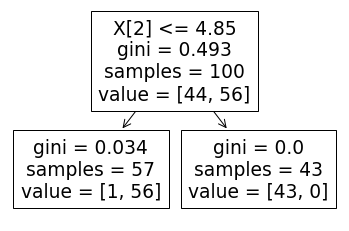

In [21]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', 
                                  random_state=100, 
                                  max_depth = 1)
clf = clf_gini.fit(X_train, y_train)
tree.plot_tree(clf)

In [22]:
y_pred = clf_gini.predict(df.iloc[0:len(df), 0:4])
df['pred2'] = y_pred
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Label,w1,pred1,misclassified,w2,pred2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0101,1
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0101,1
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0101,-1
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0101,1
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0101,1
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1,0.01,-1,0.0,0.0099,-1
146,6.3,2.5,5.0,1.9,-1,0.01,-1,0.0,0.0099,-1
147,6.5,3.0,5.2,2.0,-1,0.01,-1,0.0,0.0099,-1
148,6.2,3.4,5.4,2.3,-1,0.01,-1,0.0,0.0099,-1


In [23]:
df.loc[df.Label != df.pred2, 'misclassified2'] = 1
df.loc[df.Label == df.pred2, 'misclassified2'] = 0

In [24]:
e2 = sum(df['misclassified2'] * df['w2'])
e2

0.0701

In [25]:
alpha2 = 0.5*np.log((1-e2)/e2)
alpha2

1.2925771297218036

In [26]:
new_weight = df['w2']*np.exp(-1*alpha2*df['Label']*df.w2)
z = sum(new_weight)
normalized_weight = new_weight/z

In [27]:
normalized_weight

50     0.009971
51     0.009971
52     0.009971
53     0.009971
54     0.009971
         ...   
145    0.010029
146    0.010029
147    0.010029
148    0.010029
149    0.010029
Length: 100, dtype: float64

In [28]:
df['w3'] = round(normalized_weight, 4)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Label,w1,pred1,misclassified,w2,pred2,misclassified2,w3
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0101,1,0.0,0.01
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0101,1,0.0,0.01
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0101,-1,1.0,0.01
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0101,1,0.0,0.01
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0101,1,0.0,0.01


## Decision Tree - Round 3

In [29]:
random.seed(30)
df_3 = df.sample(df.shape[0], replace=True, weights=df['w3'])
df_3

# replace df with iris?
df_3 = df_3.iloc[:, 0:5]
X_train = df_3.iloc[:len(df), 0:4]
y_train = df_3.iloc[:len(df), 4]

[Text(167.4, 163.07999999999998, 'X[2] <= 4.85\ngini = 0.484\nsamples = 100\nvalue = [41, 59]'),
 Text(83.7, 54.360000000000014, 'gini = 0.07\nsamples = 55\nvalue = [2, 53]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.231\nsamples = 45\nvalue = [39, 6]')]

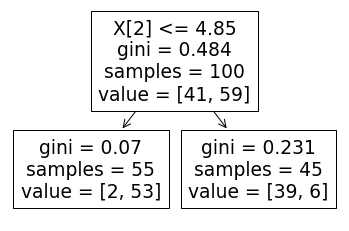

In [30]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', 
                                  random_state=100, 
                                  max_depth = 1)
clf = clf_gini.fit(X_train, y_train)
tree.plot_tree(clf)

In [31]:
y_pred = clf_gini.predict(df.iloc[0:len(df), 0:4])
df['pred3'] = y_pred
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Label,w1,pred1,misclassified,w2,pred2,misclassified2,w3,pred3
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0101,1,0.0,0.01,1
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0101,1,0.0,0.01,1
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0101,-1,1.0,0.01,-1
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0101,1,0.0,0.01,1
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0101,1,0.0,0.01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1,0.01,-1,0.0,0.0099,-1,0.0,0.01,-1
146,6.3,2.5,5.0,1.9,-1,0.01,-1,0.0,0.0099,-1,0.0,0.01,-1
147,6.5,3.0,5.2,2.0,-1,0.01,-1,0.0,0.0099,-1,0.0,0.01,-1
148,6.2,3.4,5.4,2.3,-1,0.01,-1,0.0,0.0099,-1,0.0,0.01,-1


In [32]:
df.loc[df.Label != df.pred3, 'misclassified3'] = 1
df.loc[df.Label == df.pred3, 'misclassified3'] = 0

In [33]:
e3= sum(df['misclassified3'] * df['w3'])
e3

0.07

In [34]:
alpha3 = 0.5*np.log((1-e3)/e3)
alpha3

1.2933446720489712

In [35]:
new_weight = df['w3']*np.exp(-1*alpha3*df['Label']*df.w3)
z = sum(new_weight)
normalized_weight = new_weight/z

In [36]:
normalized_weight

50     0.009871
51     0.009871
52     0.009871
53     0.009871
54     0.009871
         ...   
145    0.010129
146    0.010129
147    0.010129
148    0.010129
149    0.010129
Length: 100, dtype: float64

In [37]:
df['w4'] = round(normalized_weight, 4)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Label,w1,pred1,misclassified,w2,pred2,misclassified2,w3,pred3,misclassified3,w4
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0101,1,0.0,0.01,1,0.0,0.0099
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0101,1,0.0,0.01,1,0.0,0.0099
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0101,-1,1.0,0.01,-1,1.0,0.0099
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0101,1,0.0,0.01,1,0.0,0.0099
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0101,1,0.0,0.01,1,0.0,0.0099


## Decision Tree 4

In [38]:
random.seed(40)
df_4 = df.sample(df.shape[0], replace=True, weights=df['w4'])
df_4

# replace df with iris?
df_4 = df_4.iloc[:, 0:5]
X_train = df_4.iloc[:len(df), 0:4]
y_train = df_4.iloc[:len(df), 4]

[Text(167.4, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.495\nsamples = 100\nvalue = [55, 45]'),
 Text(83.7, 54.360000000000014, 'gini = 0.153\nsamples = 48\nvalue = [4, 44]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.038\nsamples = 52\nvalue = [51, 1]')]

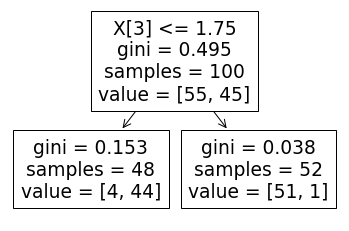

In [39]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', 
                                  random_state=100, 
                                  max_depth = 1)
clf = clf_gini.fit(X_train, y_train)
tree.plot_tree(clf)

In [40]:
y_pred = clf_gini.predict(df.iloc[0:len(df), 0:4])
df['pred4'] = y_pred
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Label,w1,pred1,misclassified,w2,pred2,misclassified2,w3,pred3,misclassified3,w4,pred4
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0101,1,0.0,0.01,1,0.0,0.0099,1
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0101,1,0.0,0.01,1,0.0,0.0099,1
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0101,-1,1.0,0.01,-1,1.0,0.0099,1
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0101,1,0.0,0.01,1,0.0,0.0099,1
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0101,1,0.0,0.01,1,0.0,0.0099,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1,0.01,-1,0.0,0.0099,-1,0.0,0.01,-1,0.0,0.0101,-1
146,6.3,2.5,5.0,1.9,-1,0.01,-1,0.0,0.0099,-1,0.0,0.01,-1,0.0,0.0101,-1
147,6.5,3.0,5.2,2.0,-1,0.01,-1,0.0,0.0099,-1,0.0,0.01,-1,0.0,0.0101,-1
148,6.2,3.4,5.4,2.3,-1,0.01,-1,0.0,0.0099,-1,0.0,0.01,-1,0.0,0.0101,-1


In [41]:
df.loc[df.Label != df.pred4, 'misclassified4'] = 1
df.loc[df.Label == df.pred4, 'misclassified4'] = 0

In [42]:
e4= sum(df['misclassified4'] * df['w4'])
e4

0.060399999999999995

In [43]:
alpha4 = 0.5*np.log((1-e4)/e4)
alpha4

1.3722325739219943

In [44]:
new_weight = df['w4']*np.exp(-1*alpha4*df['Label']*df.w4)
z = sum(new_weight)
normalized_weight = new_weight/z

In [45]:
normalized_weight

50     0.009763
51     0.009763
52     0.009763
53     0.009763
54     0.009763
         ...   
145    0.010237
146    0.010237
147    0.010237
148    0.010237
149    0.010237
Length: 100, dtype: float64

In [46]:
df['w5'] = round(normalized_weight, 4)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Label,w1,pred1,misclassified,w2,pred2,misclassified2,w3,pred3,misclassified3,w4,pred4,misclassified4,w5
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0101,1,0.0,0.01,1,0.0,0.0099,1,0.0,0.0098
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0101,1,0.0,0.01,1,0.0,0.0099,1,0.0,0.0098
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0101,-1,1.0,0.01,-1,1.0,0.0099,1,0.0,0.0098
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0101,1,0.0,0.01,1,0.0,0.0099,1,0.0,0.0098
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0101,1,0.0,0.01,1,0.0,0.0099,1,0.0,0.0098


## Final Computation

In [47]:
t = alpha1* df.pred1+alpha2* df.pred2+alpha2* df.pred2+alpha3* df.pred3+alpha4* df.pred4

In [60]:
df[['pred'+str(i) for i in range(1, 5)]]

,pred1,pred2,pred3,pred4
50,1,1,1,1
51,1,1,1,1
52,1,-1,-1,1
53,1,1,1,1
54,1,1,1,1
...,...,...,...,...
145,-1,-1,-1,-1
146,-1,-1,-1,-1
147,-1,-1,-1,-1
148,-1,-1,-1,-1


In [63]:
alpha3

1.2933446720489712

In [48]:
np.sign(list(t))

array([ 1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [49]:
df['final_pred'] = np.sign(list(t))

In [50]:
c = confusion_matrix(df['Label'], df['final_pred'])
c

array([[47,  3],
       [ 4, 46]], dtype=int64)

In [51]:
print(classification_report(df['Label'], df['final_pred']))

              precision    recall  f1-score   support

          -1       0.92      0.94      0.93        50
           1       0.94      0.92      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Label,w1,pred1,misclassified,w2,pred2,misclassified2,w3,pred3,misclassified3,w4,pred4,misclassified4,w5,final_pred
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0101,1,0.0,0.01,1,0.0,0.0099,1,0.0,0.0098,1.0
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0101,1,0.0,0.01,1,0.0,0.0099,1,0.0,0.0098,1.0
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0101,-1,1.0,0.01,-1,1.0,0.0099,1,0.0,0.0098,-1.0
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0101,1,0.0,0.01,1,0.0,0.0099,1,0.0,0.0098,1.0
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0101,1,0.0,0.01,1,0.0,0.0099,1,0.0,0.0098,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1,0.01,-1,0.0,0.0099,-1,0.0,0.01,-1,0.0,0.0101,-1,0.0,0.0102,-1.0
146,6.3,2.5,5.0,1.9,-1,0.01,-1,0.0,0.0099,-1,0.0,0.01,-1,0.0,0.0101,-1,0.0,0.0102,-1.0
147,6.5,3.0,5.2,2.0,-1,0.01,-1,0.0,0.0099,-1,0.0,0.01,-1,0.0,0.0101,-1,0.0,0.0102,-1.0
148,6.2,3.4,5.4,2.3,-1,0.01,-1,0.0,0.0099,-1,0.0,0.01,-1,0.0,0.0101,-1,0.0,0.0102,-1.0


In [54]:
# df_4 = df_4.iloc[:, 0:5]
X_train = df.iloc[:len(df), 0:4]
y_train = df.iloc[:len(df), 4]

In [55]:
clf = AdaBoostClassifier(n_estimators=4, random_state=0, max_depth=1)
clf.fit(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'max_depth'

In [ ]:
clf.score(X_train, y_train)